[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arahmanizadeh/gsproginpython/blob/main/Course1_Lesson08.ipynb)

# 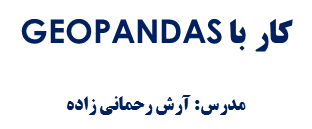

## Creating Maps with GeoPandas

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1JdVg5L3tJy8I5MI3Z09MSTvW7qBNbnz9' # for me
output = 'karnataka.zip' # for me
gdown.download(url, output)

In [ ]:
!unzip karnataka.zip

In [ ]:
!pip install geopandas
import geopandas as gpd

runtime: 33 sec

In [16]:
import os
filename = 'karnataka.gpkg'
path = filename
districts = gpd.read_file(path, layer='karnataka_districts')
roads = gpd.read_file(path, layer='karnataka_major_roads')
national_highways = roads[roads['ref'].str.match('^NH') == True]

### Matplotlib Basics


Before we start using `matplotlib` inside a Jupyter notebook, it is useful to set the matplotlib backend to `inline`. This setting makes the matplotlib graphs included in your notebook, next to the code. We use the [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) `%matplotlib` to achieve this.


It is important to understand the 2 matplotlib objects

* Figure: This is the main container of the plot. A figure can contain multiple plots inside it
* Axes:  Axes refers to an individual plot or graph. A figure contains 1 or more axes.

We can now work on creating a *figure* with multiple *axes* - each with a different rendering on a map layer.

### Rendering Map Layouts

The `subplots()` function creates one or more plots within the figure. You can design a map layout with multiple rows/columns. In the code below, we create a map with **1** row and **3** columns. Using the `set_size_inches()` function, we set the size of the map to 15in x 7in.

The `subplots()` function returns 2 items. The figure and a tuple with all the axes within the figure. As we have 3 axes, we unpack them into separate variables

GeoDataFrame objects have a `plot()` method that uses `pyplot` and creates a plot. We supply the `ax` object to the function so the resulting plot is displayed in the Axes created previously. Here we add the `districts` polygon layer into the `ax0` object - which refers to the first subplot.

Similarly, we add the `roads` layer to the second axes.

Lastly, we add the `national_highways` layer to the third axes.

We can turn off the coordinates display on the X-axis and Y-axis using `plt.axis('off')`. It is useful to set a title to each map. The `set_title()` function adds the title to the approproate axes. We specify a negative `y` parameter to place the title at the bottom of the map instead of top.

Now that our map is ready, we can save the map to the computer using the `savefig()` function.

In [29]:
os.mkdir('output')
output_filename = 'map_layout.png'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)





### Creating A Map with Multiple Layers

If we want to display multiple layers, we simply create new plots on the same `Axes`. Here we create a figure with a single axes and add the `districts`,`roads` and `national_highways` layers to the same axes.

In [ ]:
output_filename = 'multiple_layers.png'
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path, dpi=300)

### Labelling Features

We can also add labels to the maps, but that requires a bit of pre-processing. Let's say we want to add a label for each of the distrit polygons. First, we need to decide the anchor position of the label. We can use `representative_point()` to get a point inside each polygon that best represents the geometry. It is similar to a centroid, but is guranteed to be inside the polygon. Below code creates a new field in the GeoDataFrame called `label_position` with the coordinates of the anchor point.

Now we can use the `annotate()` function and iterate over each polygon to add labels with the name of the district from the *DISTRICT* column and place it at the coordinates from the *label_position* column.

# end of lesson08